# Customer Life Time Value and Sales prediction

## 1. Background
The Pareto Principle principle is simple yet powerful and important. It was named after the Italian economist, Vilfredo Pareto. In 1906 he found that 80% of the Italian land was owned by 20% of the population. 

What made Pareto's finding more essential was the high frequency occurring of the 80/20 distribution. For example, in general, 20% of your customers represent 80% of your sales. And 20% of your time produces 80% of your results. And so on.

Nowadays, the '80/20' principle often be called as an incredible tool for the growth of your business. For an instant, companies look for the similarities in their top 20% customers and find more customers like them, at the same time, taking good care to exist customers is less expensive than looking for new ones. In either way, extending or maintaining the market is costly, so having an accurate budget is necessary. 

Here it comes to the Customer Life Time Value (CLTV) - the total amount a customer is expected to spend on a business, this figure helps to define the investment in acquiring new customers and retaining existing ones. 

In this case study, I will use a dataset from an online retail company in the UK to calculate their CLTV and use Linear Regression to predict the next month sales base on existing customers. 
## 2. About the dataset. 
The dataset is donated and publiced on Kaggle, the version using in this analysis was downloaded from https://www.kaggle.com/vijayuv/onlineretail. For the description on the preview of the dataset, the business focused on housewares and stationery, it did shipping outside of the UK as well. There is no addition about the business, just the dataset alone. 
Therefore, we will do exploratory analysis to have a better understanding on the business situation.

## 3. Exploratory Analysis

In [1]:
#Loading libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset 
online = pd.read_csv('/Users/huedinh/Desktop/Data projects/Onlineretail/OnlineRetail.csv',  engine='python')
online.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#Adding columns: invoice_value,Year, Month, Day and Date to online dataframe
online['invoice_value'] = online['Quantity']*online['UnitPrice']
online['Year'] = pd.DatetimeIndex(online['InvoiceDate']).year
online['Month'] = pd.DatetimeIndex(online['InvoiceDate']).month
online['Day'] =  pd.DatetimeIndex(online['InvoiceDate']).day
online['Date'] = pd.DatetimeIndex(online['InvoiceDate']).date
online.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_value,Year,Month,Day,Date
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20,2011,12,9,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60,2011,12,9,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2011,12,9,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60,2011,12,9,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,14.85,2011,12,9,2011-12-09


In [4]:
#Monthly revenue is sum up all 'invoice_value' in a month
monthly = online.groupby(['Year', 'Month'])['invoice_value'].sum()
monthly = monthly.to_frame()
monthly = monthly.set_index(pd.Index(monthly.index))


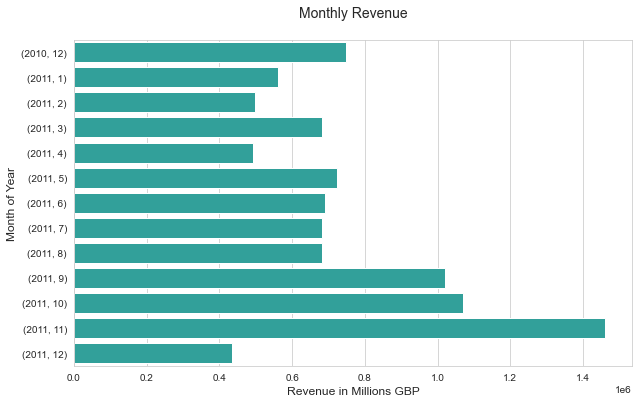

In [5]:
#Plotting the monthly revenue
sns.set_style('whitegrid')
h = sns.barplot(x = 'invoice_value', y = monthly.index, data = monthly, color = 'lightseagreen')
h.figure.set_size_inches(10, 6)
h.set_xlabel('Revenue in Millions GBP', size = 12)
h.set_ylabel('Month of Year', size = 12)
h.set_title('Monthly Revenue', size = 14, y = 1.05)
plt.show()

In [6]:
#Revenue by countries is sum up of all 'invoice_value' for each country.
revenue_per_country = online.groupby(['Country'])['invoice_value'].sum().sort_values(ascending=False)
revenue_per_country = revenue_per_country.to_frame()
revenue_per_country.head()

,invoice_value
Country,
United Kingdom,8.187806e+06
Netherlands,2.846615e+05
EIRE,2.632768e+05
Germany,2.216982e+05
France,1.974039e+05


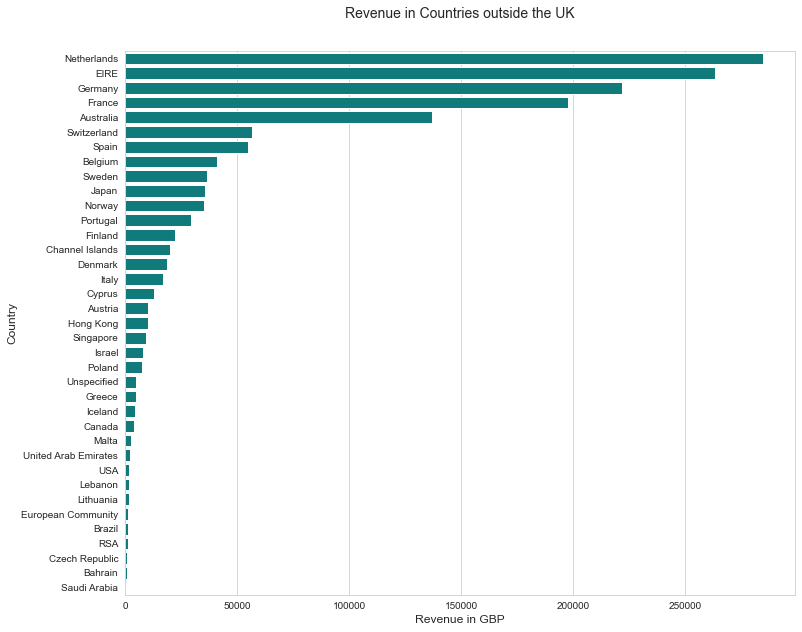

In [7]:
#Plotting countries revenue. As the domestic revenue is 30 times higher than the 2nd highest foreign market - Netherlands, 
#So we exclude the UK from our chart, to see the values in other countries. 

#Excuding the UK from the dataset
country = revenue_per_country[revenue_per_country.index != 'United Kingdom']

#Plotting 

g = sns.barplot(x = 'invoice_value', y = country.index , data = country, color = 'darkcyan')
g.figure.set_size_inches(12, 10)
g.set_xlabel('Revenue in GBP', size = 12)
g.set_ylabel('Country', size = 12)
g.set_title('Revenue in Countries outside the UK', size = 14, y = 1.05)
plt.show()

In [9]:
#The total revenue 
rev = online['invoice_value'].sum()
print('Total revenue of the business represented in the dataset is', np.round(rev,0), ' GBP')

Total revenue of the business represented in the dataset is 9747748.0  GBP


### 3.1 An overview of the dataset and the business
The dataset recorded sales transactions from 1/12/2010 to 9/12/2011, 12 months and 9 days. The total revenue for all recorded time is 9,74 million GBP(assumption),  for the last 9 days of the dataset is about 0.42 million GBP, so annual income for this business recorded is 9.3 million GBP. 

Nov is the busiest month with the highest earnings, following by October and September. Revenue from earlier months of the year was much lower than later months. 

With only 9 days in Dec 2011, revenue reached 0.42 million GBP, from my prediction, it could get up to 1.5 million by the end of the month due to holiday season. If that prediction is accurate, the earnings of Dec 2011 would be doubled of Dec the previous year. Another assumption is, this was a new business. 

The foreign market of the business is surrounding European countries and Australia (!). However, it only took 8.5% total revenue of the company.

For further analysis, I will exclude Dec 2011 from the dataset


In [10]:
#Excluding Dec, 2011 
df1 = online[(online['Year']==2010)]
df2 = online[(online['Month']!=12)]
df = pd.concat([df1,df2])


In [11]:
#Groupping revenue per invoice 
invoice = df.groupby(['Month','InvoiceNo'])['invoice_value'].sum()
invoice = invoice.to_frame()
invoice = invoice.reset_index()

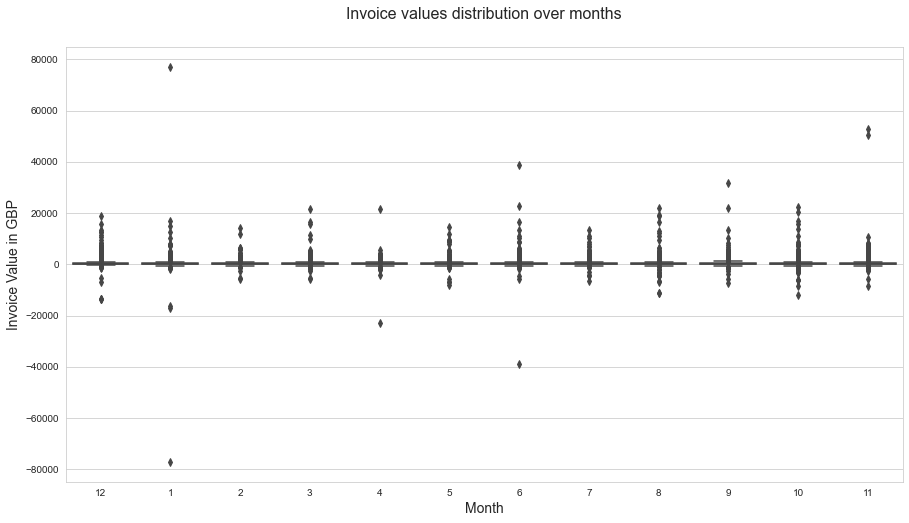

In [12]:
#Plotting the invoice distribution for each month
g = sns.boxplot(x = 'Month',y= 'invoice_value', data = invoice, order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
g.set_title('Invoice values distribution over months', size = 16, y = 1.05)
g.set_xlabel('Month', size = 14)
g.set_ylabel('Invoice Value in GBP', size = 14)
g.figure.set_size_inches(15, 8)
plt.show()

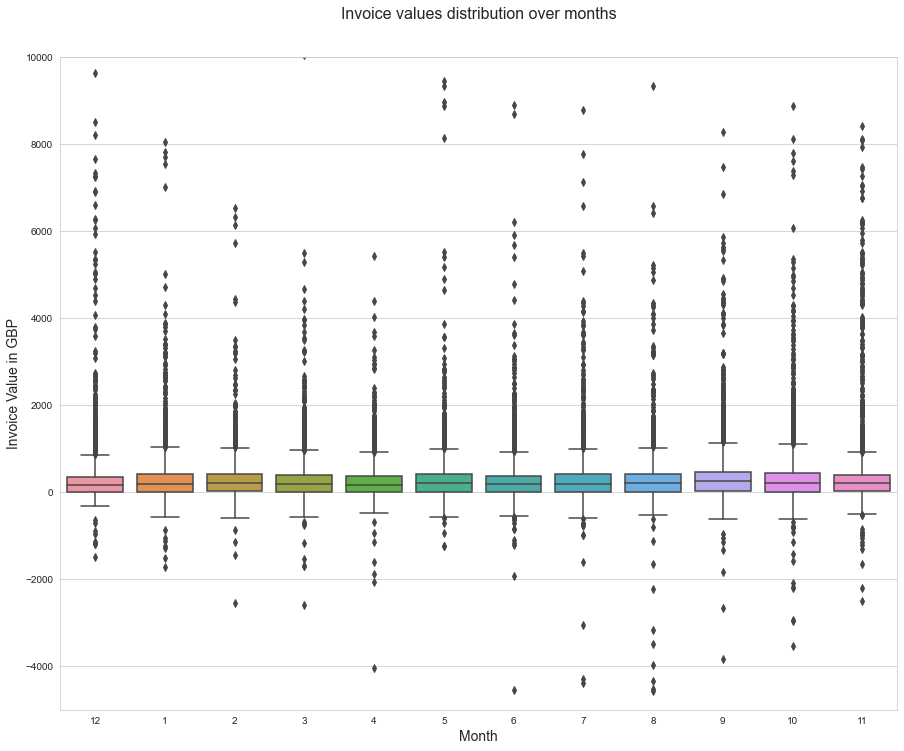

In [13]:
#There are big outliners in pervious plots, so we will slice into the smaller range with more density value
g = sns.boxplot(x = 'Month',y= 'invoice_value', data = invoice, order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
g.set_title('Invoice values distribution over months', size = 16, y = 1.05)
g.set_xlabel('Month', size = 14)
g.set_ylabel('Invoice Value in GBP', size = 14)
g.figure.set_size_inches(15, 12)
g.set_ylim(-5000, 10000)
plt.show()

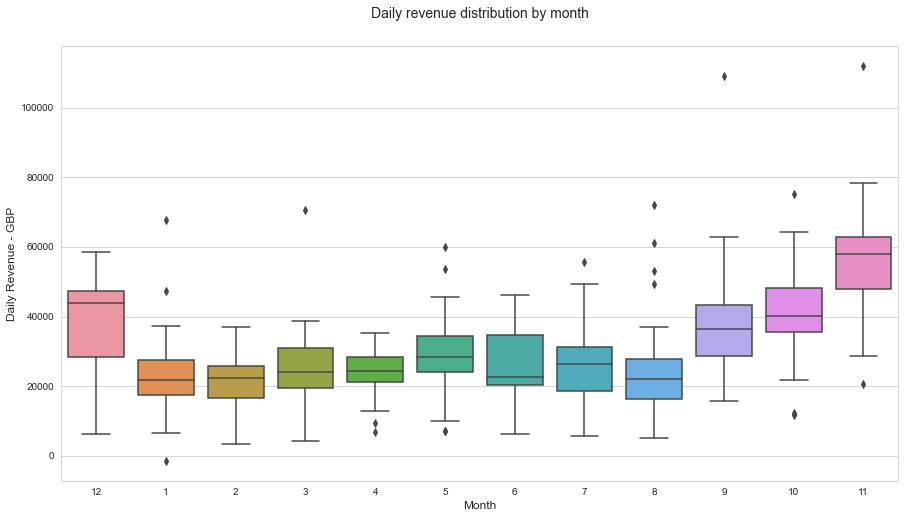

In [14]:
#Groupping revenue by day
daily = df.groupby(['Month', 'Day'])['invoice_value'].sum()
daily = daily.to_frame()
daily = daily.reset_index()

#Plotting daily revenue distribution over months
g = sns.boxplot(x = 'Month',y= 'invoice_value', data = daily, order = [12, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
g.figure.set_size_inches(15, 8)
g.set_title('Daily revenue distribution by month', size = 14, y = 1.05)
g.set_ylabel('Daily Revenue - GBP', size = 12)
g.set_xlabel('Month', size = 12)
plt.show()

### 3.2 Customer Analysis

The first boxplot shows that dataset has numbers of extreme outliners. It looks like there were a couple of big contracts (or input mistakes) they were likely to make but then got cancelled. 

Many of other outliners dropped to the range of 20K GBP, which is way larger than an average bill of any normal person to buy for their home. In other words, they do business with other business as well. 

Zooming into the smaller range (The 2nd boxplot), the number of outliners still significant. Even though the invoice values are not much varied over months, but the daily revenue distribution over months (Box plot 3rd) are significantly different from months to months. Concretely, these outliners have effected strongly on daily income. There is not enough data to conclude, but I can predict that B2B had a big impact on this business. Taking good care of them would be the core strategy. 

### 3.3 Calculating CLTV

There are multiple methods to calculate CLTV to use in specific purposes. For this business and the dataset available, I will estimate CLTV by the granular formula, which is driven by how frequency a customer purchases with the business, what are their average value per purchase and the estimate customer lifespan. 

Customer lifespan is a critical metric which heavily depended on the business model itself. When it comes to customer lifespan, it’s important to understand the difference between being a contractual and non-contractual business. Most online-stores are non-contractual businesses, it means, when a transaction is made, it is effectively over. From this article of https://www.shopify.ca/blog/customer-lifetime-value, I estimate the life-span of customer for this business is 24 months. 

In [30]:
#Granular CLTV Calculation 

#Calculate average revenue per invoice 
revenue_per_purchase = online.groupby(['InvoiceNo'])['invoice_value'].mean().mean()

#Calculate average number unique invoices per customer per month
freg = online.groupby(['CustomerID', 'Month'])['InvoiceNo'].nunique().mean()

#Define customer life-spand to 24 months
lifespand_months = 24

#Calculate granular CLV
cltv_granular = revenue_per_purchase*freg*lifespand_months

# Print granular CLV value
print('Average granular CLV is {:.1f} GBP'.format(cltv_granular))

Average granular CLV is 804.4 GBP


## 4. Using Linear Regression to predict next month's purchase

Since existing customers are making the most sales for the next short period, I will build a simple linear regression model to predict the sales for the next month base on existing customers. The result will be used for the sales team and marketing team to estimate the effort they need to spend on next month to reach the sales target. (By attracting new customers) 

For specific, the model will use the data of previous months to predict the sales of November. The sales will be predicted on 5 keys factors recency, frequency, monetary, quantity_avg and quantity_total. To make the information less bias, I only include the data of 2011 for building the model. The data from Jan to Oct will be used for training, and the data of Nov will be used for testing. Because this is the historical data, so Nov data also included new customers from that month. I will exclude them so that the model will be using solidly on existing customers. 


In [17]:
#Inspecting for sales distribution by months
df2.groupby(['Month']).size()

Month
1     35147
2     27707
3     36748
4     29916
5     37030
6     36874
7     39518
8     35284
9     50226
10    60742
11    84711
dtype: int64

In [22]:
df2['Date'] = pd.to_datetime(df2['Date'])

#Exclude target variable
online_X=df2[df2['Month']!= 11] 

# Define the snapshot date
NOW = pd.datetime(2011,11,1)

# Calculate recency by subtracting current date from the latest InvoiceDate
features = online_X.groupby('CustomerID').agg({
  'Date': lambda x: (NOW - x.max()).days,
  # Calculate frequency by counting unique number of invoices
  'InvoiceNo': pd.Series.nunique,
  # Calculate monetary value by summing all spend values
  'invoice_value': np.sum,
  # Calculate average and total quantity
  'Quantity': ['mean', 'sum']}).reset_index()

# Rename the columns
features.columns = ['CustomerID', 'recency', 'frequency', 'monetary', 'quantity_avg', 'quantity_total']
features.info()

/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/huedinh/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  import sys


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3838 entries, 0 to 3837
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      3838 non-null   float64
 1   recency         3838 non-null   int64  
 2   frequency       3838 non-null   int64  
 3   monetary        3838 non-null   float64
 4   quantity_avg    3838 non-null   float64
 5   quantity_total  3838 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 180.0 KB


In [23]:
#Build pivot table with monthly transaction per customer 
cust_month_tx = pd.pivot_table(data = df2, index = ['CustomerID'], 
                              values = 'InvoiceNo', columns = ['Month'], 
                              aggfunc = pd.Series.nunique, fill_value = 0)

cust_month_tx.info

<bound method DataFrame.info of Month       1   2   3   4   5   6   7   8   9   10  11
CustomerID                                            
12346.0      2   0   0   0   0   0   0   0   0   0   0
12347.0      1   0   0   1   0   1   0   1   0   1   0
12348.0      1   0   0   1   0   0   0   0   1   0   0
12349.0      0   0   0   0   0   0   0   0   0   0   1
12350.0      0   1   0   0   0   0   0   0   0   0   0
...         ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
18280.0      0   0   1   0   0   0   0   0   0   0   0
18281.0      0   0   0   0   0   1   0   0   0   0   0
18282.0      0   0   0   0   0   0   0   2   0   0   0
18283.0      2   1   0   1   1   2   2   0   1   1   4
18287.0      0   0   0   0   1   0   0   0   0   2   0

[4197 rows x 11 columns]>

There are 3838 unique customers from October backward, and 4197 customers in November, that means, there are 359 new customers in November. Therefore, I will account this factor to the accuracy of the model. 

In [24]:
#Flat the pivot table
flattened = pd.DataFrame(cust_month_tx.to_records())

#Left join Flattened pivot table to the features table on CustomerID
join = features.merge(flattened, on = 'CustomerID')
join

,CustomerID,recency,frequency,monetary,quantity_avg,quantity_total,1,2,3,4,5,6,7,8,9,10,11
0,12346.0,287,2,0.00,0.000000,0,2,0,0,0,0,0,0,0,0,0,0
1,12347.0,1,5,3373.39,13.907143,1947,1,0,0,1,0,1,0,1,0,1,0
2,12348.0,37,3,904.44,77.642857,1087,1,0,0,1,0,0,0,0,1,0,0
3,12350.0,272,1,334.40,11.588235,197,0,1,0,0,0,0,0,0,0,0,0
4,12352.0,34,10,1233.68,4.287500,343,0,1,7,0,0,0,0,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3833,18280.0,239,1,180.60,4.500000,45,0,0,1,0,0,0,0,0,0,0,0
3834,18281.0,142,1,80.82,7.714286,54,0,0,0,0,0,1,0,0,0,0,0
3835,18282.0,84,2,98.76,8.750000,70,0,0,0,0,0,0,0,2,0,0,0
3836,18283.0,5,11,1235.32,1.652977,805,2,1,0,1,1,2,2,0,1,1,4


Now, the dataset is perfectly in equal length so we can do spliting to train/test set

In [25]:
#Finalise data preparation and split to train/test

#Store identifier and target variable column names
custid = ['CustomerID']
target = ['11']
#Extract target variable 
Y = join[target]

#Extract features for culumns name
cols = [col for col in features.columns if col not in custid]

#Store features
X = features[cols]

In [26]:
from sklearn.model_selection import train_test_split
#Split data to training and testing
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.25, random_state = 99)

#Print the shape of the datasets
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape )

(2878, 5) (960, 5) (2878, 1) (960, 1)


In [27]:
from sklearn.linear_model import LinearRegression
# Initialize linear regression instance
linreg = LinearRegression()

# Fit the model to training dataset
linreg.fit(train_X, train_Y)

# Predict the target variable for training data
train_pred_Y = linreg.predict(train_X)

# Predict the target variable for testing data
test_pred_Y = linreg.predict(test_X)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Calculate root mean squared error on training data
rmse_train = np.sqrt(mean_squared_error(train_Y, train_pred_Y))

# Calculate mean absolute error on training data
mae_train = mean_absolute_error(train_Y, train_pred_Y)

# Calculate root mean squared error on testing data
rmse_test = np.sqrt(mean_squared_error(test_Y, test_pred_Y))

# Calculate mean absolute error on testing data
mae_test = mean_absolute_error(test_Y, test_pred_Y)

# Print the performance metrics
print('RMSE train: {}; RMSE test: {}\nMAE train: {}, MAE test: {}'.format(rmse_train, rmse_test, mae_train, mae_test))

RMSE train: 1.1701949844696629; RMSE test: 1.0159673743701614
MAE train: 0.6862575178064119, MAE test: 0.6416455269887983


In [29]:
# Import `statsmodels.api` module
import statsmodels.api as sm

# Initialize model instance on the training data
olsreg = sm.OLS(train_Y, train_X)

# Fit the model
olsreg = olsreg.fit()

# Print model summary
print(olsreg.summary())

                                 OLS Regression Results                                
Dep. Variable:                     11   R-squared (uncentered):                   0.618
Model:                            OLS   Adj. R-squared (uncentered):              0.618
Method:                 Least Squares   F-statistic:                              930.8
Date:                Wed, 04 Nov 2020   Prob (F-statistic):                        0.00
Time:                        09:42:33   Log-Likelihood:                         -4536.2
No. Observations:                2878   AIC:                                      9082.
Df Residuals:                    2873   BIC:                                      9112.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

### Model result interpretation

##### R-squared and Adj. R-squared
    
    It signifies the “percentage variation in dependent that is explained by independent variables”. In our case, 61,8% variation Sales is explained by recency, frequency, monetary, quantity_avg and  quantity_total. The rest we can assume by excluding the expandability of the customer size intinially and the model error. 
    
##### Prob(F-Statistic): 

    The overall significance of the regression. The null hypothesis under this is “all the regression coefficients are equal to zero”. Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is 0, This implies the regressions is meaningful.
    
##### Durbin-watson: 

    Another assumption of OLS is of homoscedasticity. This implies that the variance of errors is constant. A value between 1 to 2 is preferred. Here, it is 1.941 implying that the regression results are reliable from the interpretation side of this metric.

##### Prob(Omnibus): 

    Assumptions of OLS is that the errors are normally distributed. Omnibus test is performed in order to check this. Here, the null hypothesis is that the errors are normally distributed. Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption. In this case Prob(Omnibus) is 0, which implies that the OLS assumption is <b>not satisfied<b>. Due to this, the coefficients estimated out of it are not Best Linear Unbiased Estimators(BLUE).
    
##### Coefficients

    frequency Seems to have a strong coefficient to the outcome of sales, from our result, 16.7% of sales decided by this variable, since other variables do not have a significant impact on the result. 
        
        This is also explained by P values, where this value is high for all vairables but exeptionally accepted at which to reject the null hypothesis.(With a P value of 0%  there is no chance that results you are seeing would have come up in a random distribution, so you can say with a 100% probability of being correct that the variable is having some effect, assuming your model is specified correctly.)

## 5. Conclusion

This case study again shows the strong implementation of the "80/20" principle in the business, despite the non-contractual model of the quick, fast buying online retail model. 

Throughout the analysis, the company should take special care to their business partner - these outliners on our invoice-values distribution chart, which generated high incoming for the company and had a high frequency of purchasing product. 

Moreover, besides taking good care of existing customers, attracting new ones is also essential as it creates a wider environment for the business to grow.
